In [ ]:
import matplotlib.pyplot as plt
import torch
import imageio
import dill
import numpy as np


In [6]:
def draw_plots(
    results1: list, 
    results2: list,
    timesteps: int = int(1e6), 
    val_freq: int = int(1e5),
    q=5
):
    objs1 = []
    for result in results1:
        with open(f'../results/dqn_exps/{result}', 'rb') as file:
            temp = dill.load(file)
            objs1.append(temp)        
        
        file.close()
        
    objs2 = []
    for result in results2:
        with open(f'../results/dqn_exps/{result}', 'rb') as file:
            temp = dill.load(file)
            objs2.append(temp)        
        
        file.close()
        
    plt.style.use('ggplot')
    fig, axs = plt.subplots(2, 2, figsize=(16, 8))
    
    def basic_plot(ax, xs, objs, item, label, color):
        items = []
        for obj in objs:
            items.append(obj[item])
        data = np.array(items)
        mean = np.mean(data, axis=0)
        
        ci_upper = list(np.percentile(data, q=100-q, axis=0))
        ci_lower = list(np.percentile(data, q=q, axis=0))
        
        ax.fill_between(xs, ci_lower, ci_upper, alpha=0.2, color=color)    
        ax.plot(xs, mean, label=label, color=color)
        
        
    # ----------------------- for reg_test_scores -------------------
    xs = np.arange(0, timesteps + val_freq, val_freq)
    xs = np.delete(xs, [0, 1])
    
    basic_plot(axs[0, 0], xs, objs1, 'reg_test_scores', 'Test Env Basic', 'blue')
    basic_plot(axs[0, 0], xs, objs2, 'reg_test_scores', 'Test Env DQN', 'red')
    axs[0, 0].set_title(f"Test Env Scores Comparison")
    axs[0, 0].set_xlabel("Timestep")
    axs[0, 0].set_ylabel("Rewards")
    axs[0, 0].set_ylim(0, 1.0)
    axs[0, 0].legend()
    axs[0, 0].grid(True)
    
    
    # ----------------------- for Uniqueness ---------------------
    
    xs = range(1, timesteps+1)
    
    basic_plot(axs[0, 1], xs, objs1, 'uniqueness', 'Uniqueness Basic', 'blue')
    basic_plot(axs[0, 1], xs, objs2, 'uniqueness', 'Uniqueness DQN', 'red')
    
    axs[0, 1].set_title(f"Uniqueness Comparison")
    axs[0, 1].set_xlabel("Timestep")
    axs[0, 1].set_ylabel("Uniqueness")
    axs[0, 1].set_ylim(0, 1.0)
    axs[0, 1].legend()
    axs[0, 1].grid(True)
    
    
    # ----------------------- LCs  ---------------------
    
    def plot_lcs(ax, xs, objs, label, color):
        lcs = []
        for obj in objs:
            lcs.append(obj['lc_curves'])
        data_lcs = np.array(lcs)
        mean_lcs = np.mean(data_lcs, axis=(0, 1))
        mean_lcs1_axis1 = np.mean(data_lcs, axis=1) # (3, 21)
        ci_upper = list(np.percentile(mean_lcs1_axis1, q=100-q, axis=0))
        ci_lower = list(np.percentile(mean_lcs1_axis1, q=q, axis=0))
        
        ax.fill_between(xs, ci_lower, ci_upper, alpha=0.2, color=color)    
        ax.plot(xs, mean_lcs, label=label, color=color)
    
    xs = np.arange(0, 200000 + 10000, 10000)
    plot_lcs(axs[1, 0], xs, objs1, 'Regression Basic', 'blue')
    plot_lcs(axs[1, 0], xs, objs2, 'Regression DQN', 'red')
    axs[1, 0].set_title(f"Validation Regression Score")
    axs[1, 0].set_xlabel("Timestep")
    axs[1, 0].set_ylabel("Rewards")
    axs[1, 0].set_ylim(0, 1.0)
    axs[1, 0].legend()
    axs[1, 0].grid(True)
    
    fig.tight_layout()
    fig.show()
    
    

C:\Users\garga\AppData\Local\Temp\ipykernel_33860\3791211179.py:96: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


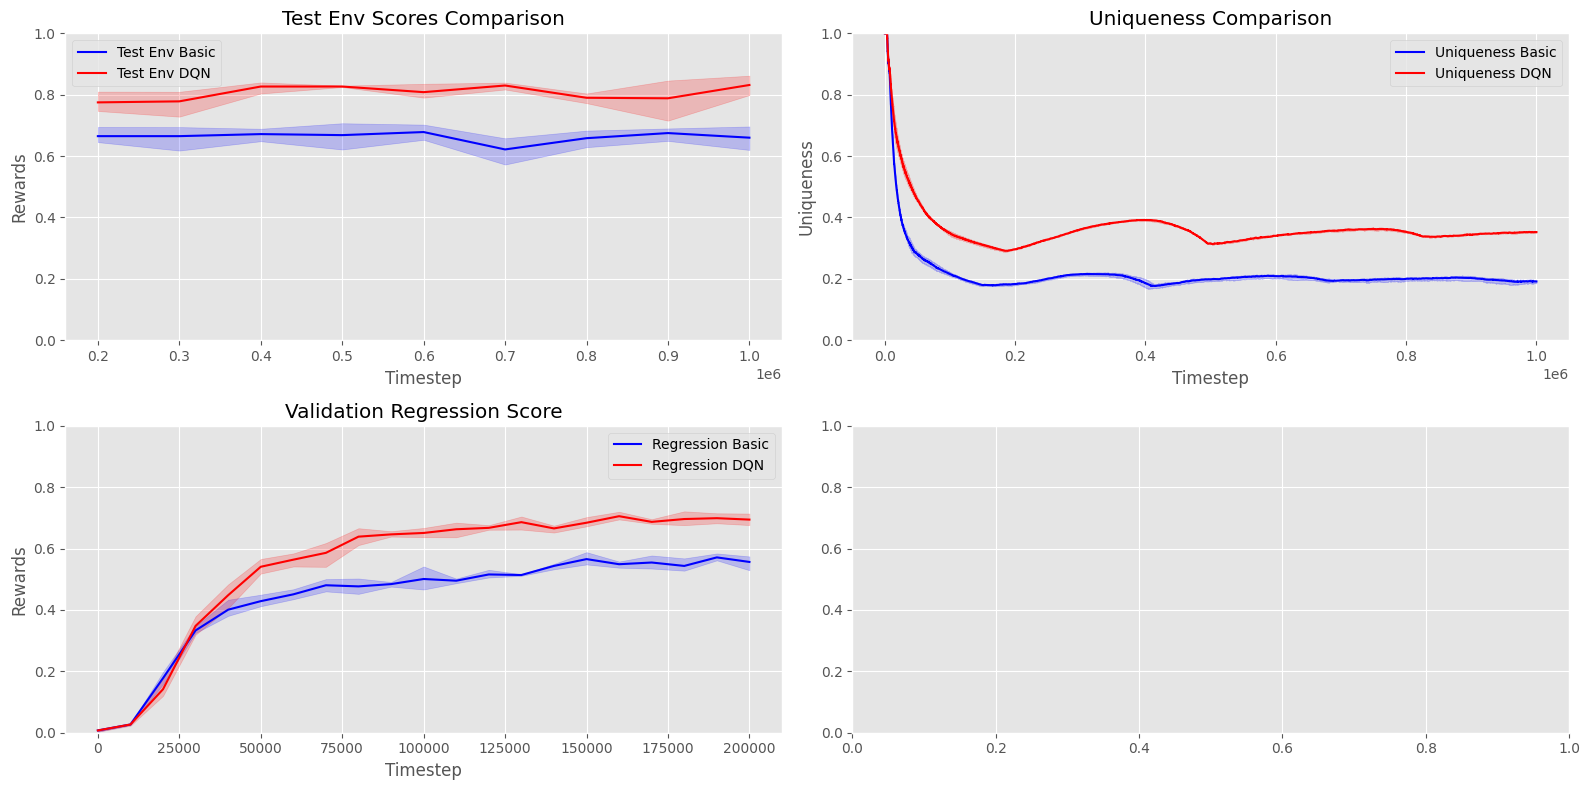

In [7]:
draw_plots(
    ['basic_rnd_seed_0_1000000.pl', 'basic_rnd_seed_1_1000000.pl', 'basic_rnd_seed_2_1000000.pl'],
    ['rnd_dqn_seed_0_1000000.pl', 'rnd_dqn_seed_1_1000000.pl', 'rnd_dqn_seed_2_1000000.pl']
)